### Red_Wine_Dataset_Analysis_And_Predicting_Qualities_From_Physicochemical_Properties
###                                                                                                             (Machine Learning using regression)
***

This dataset contains information about(Red Wine) Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer).

#### About this wine(Vinho Verde):
Today the Vinho Verde region, occupying northwest Portugal, is one of the largest and oldest wine regions in the world. It is home to thousands of producers, generates a wealth of economic activity and jobs, and strongly contributes to the development of Minho and the country. Wines with the designation of origin Vinho Verde produced here are unique and valued in the world of wine.
More information can be found at [VINHO VERDE](http://www.vinhoverde.pt/en/).
 <img src="vinho.jpg" alt="A Bottle From Vinho Verde" title="A Bottle From Vinho Verde"/>
#### About this dataset:
Number of Instances: 1599<br>
Number of Attributes: (11 + output attribute)<br>
Attribute Information:<br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10)<br>
Missing Attribute Values: None<br>
[Source](http://www3.dsi.uminho.pt/pcortez/Home.html)<br>
****Note! This dataset contains more normal quality wines and poor ones
#### About this project:
First, we will try to take all the Instances to create a OLS regression Model.This will give a good idea between the relation between quality and it's input attribute.<br>
After This , we will divide the dataset into two i.e. one for training another for predecting. As we have our OLS model previously created, we can measure  how accurate or compare the difference  of  predecting result and the OLS model.
******

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

Let's import our dataset and see how it looks like

In [46]:
wine=pd.read_csv('wine.csv')
print(wine.head(3))
wine.describe()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now we try to create an OLS model, using all Instances 

In [47]:
test_output=wine.loc[:,'quality']

test_input=wine.iloc[:,0:11]
mod = sm.OLS(test_output,test_input)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.108e+04
Date:                Tue, 18 Jul 2017   Prob (F-statistic):               0.00
Time:                        07:48:09   Log-Likelihood:                -1569.7
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3221.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
fixed acidity            0.0042      0.016      0.255      0.799        -0.028     0.036
volatile acidity        -1.0997      0.120     -9.157      0.000        -1.335    -0.864
citric acid             -0.1841      0.147     -1.251      0.211        -0.473     0.105
residual sugar           0.0071      0.012      0.587      0.557        -0.017     0.031
chlorides               -1.9114      0.418     -4.575      0.000        -2.731    -1.092
free sulfur dioxide      0.0045      0.002      2.102      0.036         0.000     0.009
total sulfur dioxide    -0.0033      0.001     -4.565      0.000        -0.005    -0.002
density                  4.5291      0.625      7.243      0.000         3.303     5.756
pH                      -0.5229      0.160     -3.268      0.001        -0.837    -0.209
sulphates                0.8871      0.111      8.006      0.000         0.670     1.104
alcohol                  0.2970      0.017     17.217      0.000         0.263     0.331
==============================================================================
Omnibus:                       25.388   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.530
Skew:                          -0.159   Prob(JB):                     7.09e-09
Kurtosis:                       3.680   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's plot the scatter plot between the actual and fitted values, after knowing the OLS result

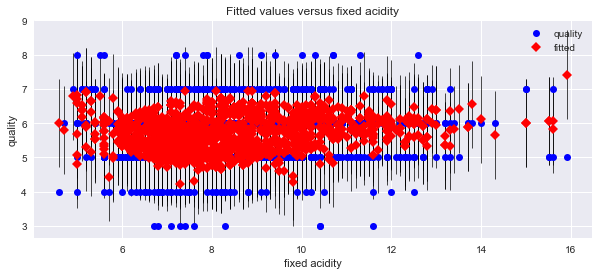

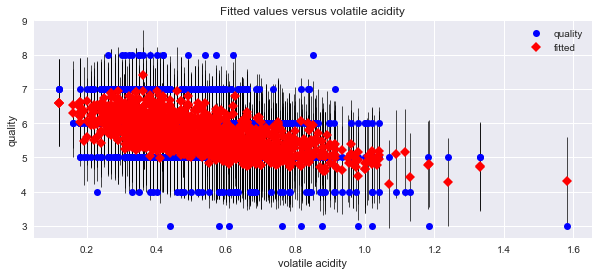

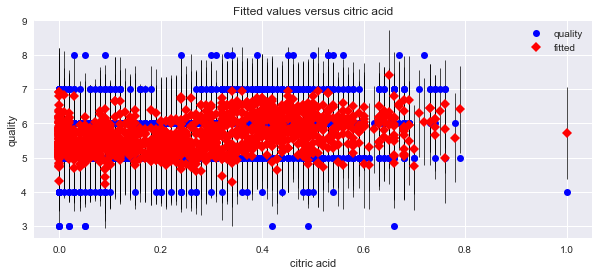

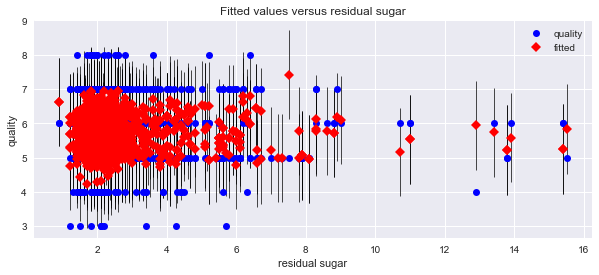

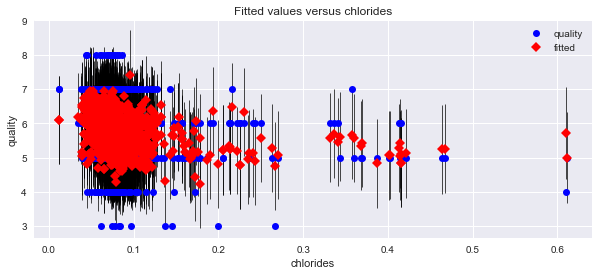

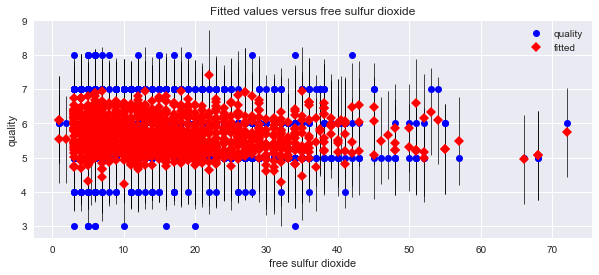

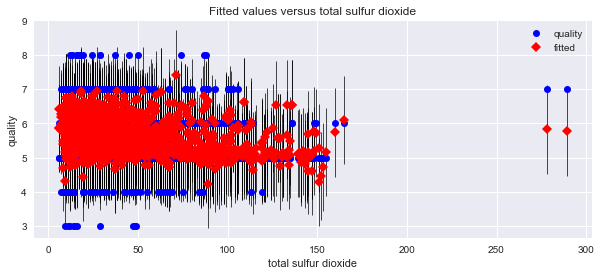

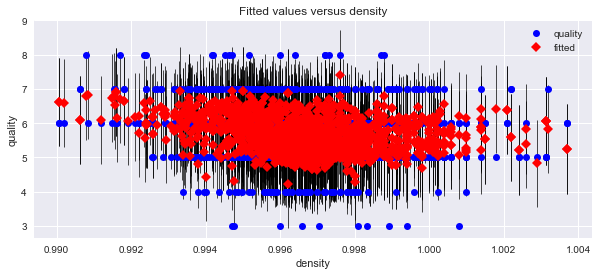

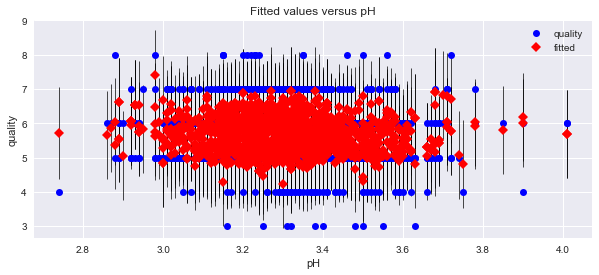

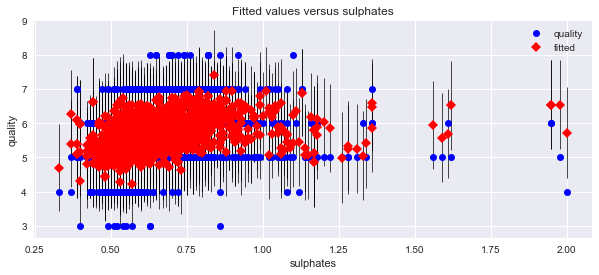

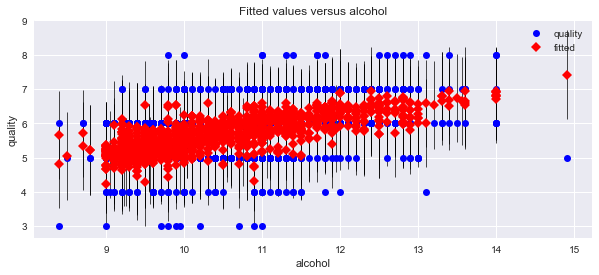

In [48]:


fig,ax=plt.subplots(figsize=(10,4))


sm.graphics.plot_fit(res,0,ax=ax)
fig1,ax1=plt.subplots(figsize=(10,4))
fig2,ax2=plt.subplots(figsize=(10,4))
fig3,ax3=plt.subplots(figsize=(10,4))
fig4,ax4=plt.subplots(figsize=(10,4))
fig5,ax5=plt.subplots(figsize=(10,4))
fig6,ax6=plt.subplots(figsize=(10,4))
fig7,ax7=plt.subplots(figsize=(10,4))
fig8,ax8=plt.subplots(figsize=(10,4))
fig9,ax9=plt.subplots(figsize=(10,4))
fig10,ax10=plt.subplots(figsize=(10,4))

sm.graphics.plot_fit(res,1,ax=ax1)
sm.graphics.plot_fit(res,2,ax=ax2)
sm.graphics.plot_fit(res,3,ax=ax3)
sm.graphics.plot_fit(res,4,ax=ax4)
sm.graphics.plot_fit(res,5,ax=ax5)
sm.graphics.plot_fit(res,6,ax=ax6)
sm.graphics.plot_fit(res,7,ax=ax7)
sm.graphics.plot_fit(res,8,ax=ax8)
sm.graphics.plot_fit(res,9,ax=ax9)
sm.graphics.plot_fit(res,10,ax=ax10)

plt.show()


### Now_Let's_Talk_About_The_Attributes_And_It's_Effect_On_Quality
1. Fixed Acidity- from the fitted value of the OLS model we can see that for  medium quality we need to keep the unit between (6-9)
2. Volatile Acidity- we can see, as volatile acidity increases quality decrease, so we can select the unit between (0.2-0.6)
3. Citric Acidity- here, quality increases a bit with increase in citric acidity, so we can select (0.0-0.4)
> The acidity in wine is an important component in the quality and taste of the wine. It adds a sharpness to the flavors and is detected most readily by a prickling sensation on the sides of the tongue and a mouth-watering aftertaste. Of particular importance is the balance of acidity versus the sweetness of the wine (the leftover residual sugar) and the more bitter components of the wine (most notably tannins but also includes other phenolics). A wine with too much acidity will taste excessively sour and sharp. A wine with too little acidity will taste flabby and flat, with less defined flavors.

4. Residual sugar- we can select (1-4)
>A mean value of percent sugar needed to cause a 50% correct response level was determined for several concentrations of acid. A linear relationship  was found between the mean value of sugar and the difference in the acid level used for its determination as compared with the acid level in the control.

5. Chlorides- we can select (0.0-0.15)
>An article in the American Journal of Enology and Viticulture last year mentions Australian growers’ and winemakers’ experience that grapes that taste salty may clock in under the legal sodium chloride limit and vice-versa.Most of the non-sodium chloride salts that show up in wine – potassium chloride is notable – register as bitter 

6. Free Sulphur dioxides-according to the model, we can select (2-25)
7. Toltal Sulphur dioxides- here we can see as unit of sulphur increases quality decreases after a certain value, we can select(0-50/75)
>Sulphur dioxide has an unpleasant smell, like that of a struck match, detectable at very low concentrations.Adding too much sulphur dioxide breaks the principle of naturalness in wine.

8. Density- we can see after a certain increase in density quality decrease and after that it reamians constant, we can select(0.994-0.996)
9. pH- we can select (3.1-3.5)
>In essence it affects nearly every aspect of your wine. The pH affect flavor, aroma, color, tartrate precipitation, carbon dioxide absorption, malolactic fermentation, stability, ageablity, and fermentation rate. These are just a handful of the more noticeable affects. It can also affect the many chemical reactions that take place in a wine during and after fermentation.
With the right acid level, which is subjective to a point, you can lock in flavors, aroma, a healthy color, and make sure your wine has good mouthfeel. Your fermentation will also go more smoothly.
When the acid levels are too low your wine will lack body, the mouthfeel will be off, and it will taste weak or flabby. The wine can also pick up a brownish hue.

10. Sulphates- we can see as sulphates increases the quality increases, we can select(0.50-1.00)
11. Alcohol- here, as alcohol increases the quality increases, we can select(10-13)<br>
[source](https://en.wikipedia.org/wiki/Wine)<br>
#### NOTE:
<div class="alert alert-block alert-danger"> In our model we can see that fixed acidity, citric acidity and residual sugar has a probablity greater then alpha level(0.05)
and statistically not significant, likely to happen by chance.So, we can remove this attribrutes as we procced further. </div>


In [49]:
wine=pd.read_csv('wine.csv')
wine=wine.drop('fixed acidity',axis=1)
wine=wine.drop('citric acid',axis=1)
wine=wine.drop('residual sugar',axis=1)

In [50]:
wine.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<div class="alert alert-block alert-success">Now let's split the dataset in 7:3 ratio for training and predicting<br>
X=(input features)<br>
Y=(output features)
</div>

In [52]:
X=wine.drop('quality',axis=1)
Y=wine['quality']
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,Y,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1071, 8)
(528, 8)
(1071,)
(528,)


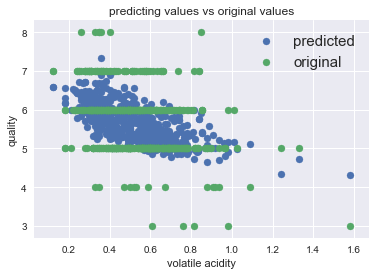

In [65]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_pred=lm.predict(X_test)

a=plt.scatter(X_test['volatile acidity'],Y_pred)
b=plt.scatter(X_test['volatile acidity'],Y_test)
plt.xlabel("volatile acidity")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">as we predicted earlier increase in volatile acidity decrease quality so from here we see that our unit is between (0.2-0.6) as predicted earlier from the OLS regression.</div>

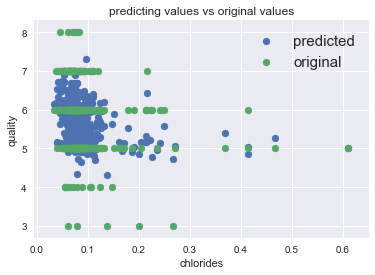

In [67]:
a=plt.scatter(X_test['chlorides'],Y_pred)
b=plt.scatter(X_test['chlorides'],Y_test)
plt.xlabel("chlorides")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">here, the result for chlorides is also same as earlier predicted(0.0-0.15)</div>

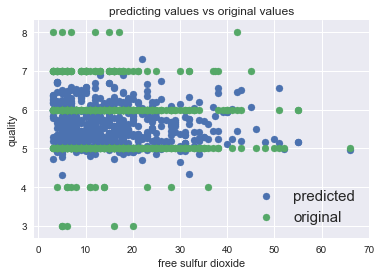

In [70]:
a=plt.scatter(X_test['free sulfur dioxide'],Y_pred)
b=plt.scatter(X_test['free sulfur dioxide'],Y_test)
plt.xlabel("free sulfur dioxide")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">prediting values for free sulphur dioxides lies between(2-20) almost close as earlier predicted</div>

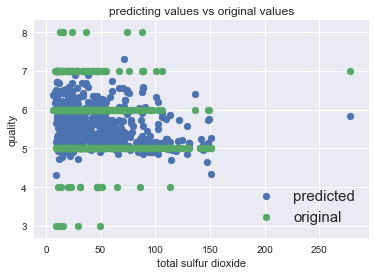

In [72]:
a=plt.scatter(X_test['total sulfur dioxide'],Y_pred)
b=plt.scatter(X_test['total sulfur dioxide'],Y_test)
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">total sulfur dioxide lies between(5-40),it's also too close as our earlier prediction</div>

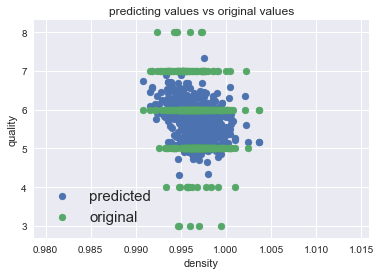

In [74]:
a=plt.scatter(X_test['density'],Y_pred)
b=plt.scatter(X_test['density'],Y_test)
plt.xlabel("density")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">density  lies between(0.995-0.998)</div>

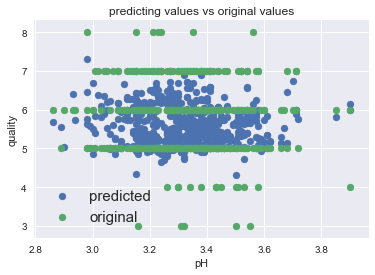

In [76]:
a=plt.scatter(X_test['pH'],Y_pred)
b=plt.scatter(X_test['pH'],Y_test)
plt.xlabel("pH")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">ph prediciting values between(3.1-3.4).it's also close as predicted</div>

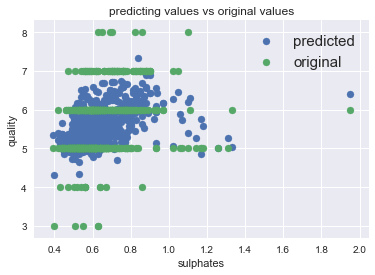

In [78]:
a=plt.scatter(X_test['sulphates'],Y_pred)
b=plt.scatter(X_test['sulphates'],Y_test)
plt.xlabel("sulphates")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">as predicited earlier increase in small amount of sulphates increases quality,we can see this more precisely here. We take a range of(0.4-0.8)</div>

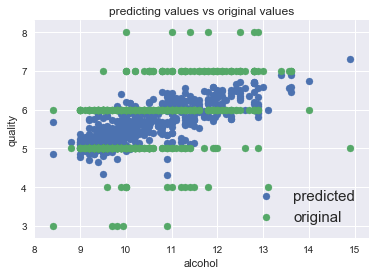

In [80]:
a=plt.scatter(X_test['alcohol'],Y_pred)
b=plt.scatter(X_test['alcohol'],Y_test)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.title("predicting values vs original values")
plt.legend((a,b),('predicted','original'),fontsize=15)

<div class="alert alert-block alert-success">as alcohol increases quality too increases,we can get an idea from here. Alcohol lies between(10-13)</div>

<div class="alert alert-block alert-danger">So, as we predicted effect of the input attributes from the OLS is quiet close to our predicting values from the machine.<br>
From the result,we found the accuracy of the red wine quality is highly correlated to pH,alcohol,sulphates,total sulfur dioxide and volatile acidity.Therefore we can suggest the manufacturer should control these attribrutes.</div>

#### Conclusion:
As this wine is known from almost 1976 and it's the life of producer,country,economy and culture so, producer should try hard to control the physicochemical propreties to retains its history.
<img src="w.jpg" alt="Land of vinho verde" title="Land of vinho verde" />

#### Inquested by Subhendu Mondal